In [9]:
import cv2
from PIL import Image 
from IPython.display import display

In [13]:
image=cv2.imread(r'/mnt/c/Users/yamshee.fatima/Desktop/image & OCR/image-difference/image-difference/images/original_01.png')

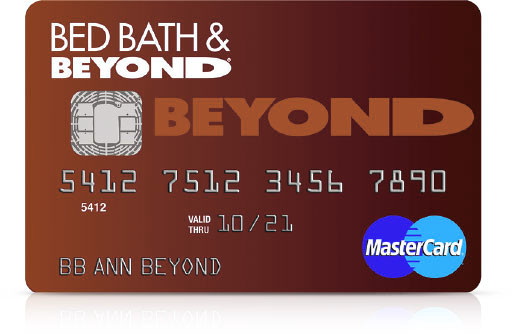

In [14]:
display(Image.fromarray(image))

In [15]:
image.shape


(334, 516, 3)

In [17]:
# we need to keep in mind aspect ratio so the image does not look skewed or distorted -- therefore, we calculate
# the ratio of the new image to the old image

r = 100.0 / image.shape[1]
dim = (100, int(image.shape[0] * r))
print(r,dim)

0.1937984496124031 (100, 64)


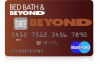

In [18]:
# perform the actual resizing of the image and show it
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
display(Image.fromarray(resized))


In [20]:
# grab the dimensions of the image and calculate the center of the image
(h, w) = image.shape[:2]
center = (w / 2, h / 2)
print(h,w,center)

334 516 (258.0, 167.0)


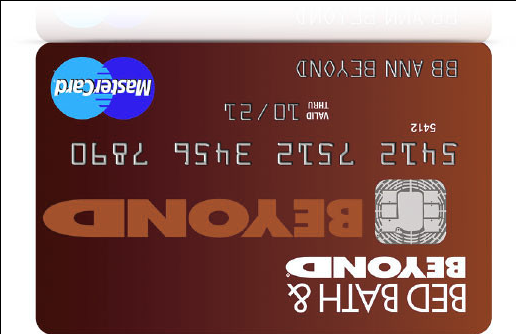

[[-1.0000000e+00  1.2246468e-16  5.1600000e+02]
 [-1.2246468e-16 -1.0000000e+00  3.3400000e+02]]


In [22]:
# rotate the image by 180 degrees
M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
display(Image.fromarray(rotated))
print(M)

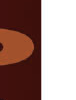

In [23]:
# crop the image using array slices -- it's a NumPy array after all!
cropped = image[70:170, 440:540]
display(Image.fromarray( cropped))

In [25]:
#Raw Pixel Feature Vectors
raw = image.flatten()
raw.shape
print(raw)

[255 255 255 ... 255 255 255]


In [27]:
#Color Mean
means = cv2.mean(image)
means


(140.93447407510558, 101.54382514041684, 98.24761523464699, 0.0)

In [28]:
#Color Mean and Standard Deviation
(means, stds) = cv2.meanStdDev(image)

In [29]:
# means and standard deviations into a single color feature vector:
import numpy as np
stats = np.concatenate([means, stds]).flatten()
stats

array([140.93447408, 101.54382514,  98.24761523,  70.4569529 ,
        92.47115309,  97.72407673])

In [33]:
#Color Histograms
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
hist.shape
hist.flatten()

array([1.6000e+02, 1.9000e+01, 8.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 1.5000e+01, 1.0000e+01, 3.3000e+01,
       6.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
       9.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00,
       0.0000e+00, 0.0000e+00, 4.0000e+00, 3.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 3.0000e+00, 7.4000e+01, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.6500e+03,
       8.0000e+01, 1.1000e+01, 4.0000e+00, 5.0000e+00, 6.0000e+00,
       3.7000e+01, 1.2470e+03, 1.7400e+02, 3.4400e+02, 4.0000e